# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

# Comparison between the types

In [6]:
# General
M_F = results(dge,contrast= c(0,1,0,0,0,1/3,1/3,1/2,0,0), alpha=0.05, test="Wald")
# Age
M_F_8w = results(dge,contrast= c(0,1,0,0,0,0,0,1/2,0,0), alpha=0.05, test="Wald")
M_F_52w = results(dge,contrast= c(0,1,0,0,0,0,1,1/2,0,0), alpha=0.05, test="Wald")
M_F_104w = results(dge,contrast= c(0,1,0,0,0,1,0,1/2,0,0), alpha=0.05, test="Wald")
# Type
M_F_SPF = results(dge,contrast= c(0,1,0,0,0,0,0,1/2,0,0), alpha=0.05, test="Wald")
M_F_GF = results(dge,contrast= c(0,1,0,0,0,0,1,1/2,0,0), alpha=0.05, test="Wald")
# Type and age
M_F_SPF_8w = results(dge,contrast= c(0,1,0,0,0,0,0,0,0,0), alpha=0.05, test="Wald")
M_F_GF_8w = results(dge,contrast= c(0,1,0,0,0,0,0,1,0,0), alpha=0.05, test="Wald")
M_F_SPF_52w = results(dge,contrast= c(0,1,0,0,0,0,1,0,0,0), alpha=0.05, test="Wald")
M_F_GF_52w = results(dge,contrast= c(0,1,0,0,0,0,1,1,0,0), alpha=0.05, test="Wald")
M_F_SPF_104w = results(dge,contrast= c(0,1,0,0,0,1,0,0,0,0), alpha=0.05, test="Wald")
M_F_GF_104w = results(dge,contrast= c(0,1,0,0,0,1,0,1,0,0), alpha=0.05, test="Wald")

In [8]:
stats = matrix(0, nrow=12, ncol=3)
rownames(stats) = c("M VS F",
                    "M VS F (8w)", "M VS F (52w)", "M VS F (104w)",
                    "M VS F (SPF)", "M VS F (GF)",
                    "M VS F (SPF, 8w)", "M VS F (GF, 8w)", "M VS F (SPF, 52w)", "M VS F (GF, 52w)", "M VS F (SPF, 104w)", "M VS F (GF, 104w)")
colnames(stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
stats[1,] = get_stats_padj(M_F)
stats[2,] = get_stats_padj(M_F_8w)
stats[3,] = get_stats_padj(M_F_52w)
stats[4,] = get_stats_padj(M_F_104w)
stats[5,] = get_stats_padj(M_F_SPF)
stats[6,] = get_stats_padj(M_F_GF)
stats[7,] = get_stats_padj(M_F_SPF_8w)
stats[8,] = get_stats_padj(M_F_GF_8w)
stats[9,] = get_stats_padj(M_F_SPF_52w)
stats[10,] = get_stats_padj(M_F_GF_52w)
stats[11,] = get_stats_padj(M_F_SPF_104w)
stats[12,] = get_stats_padj(M_F_GF_104w)
stats

,Wald padj < 0.05,LFC > 0 (Wald padj < 0.05),LFC < 0 (Wald padj < 0.05)
M VS F,4242,2193,2049
M VS F (8w),3272,1716,1556
M VS F (52w),4299,2154,2145
M VS F (104w),158,83,75
M VS F (SPF),3272,1716,1556
M VS F (GF),4299,2154,2145
"M VS F (SPF, 8w)",2462,1291,1171
"M VS F (GF, 8w)",2730,1419,1311
"M VS F (SPF, 52w)",3459,1735,1724
"M VS F (GF, 52w)",3346,1689,1657


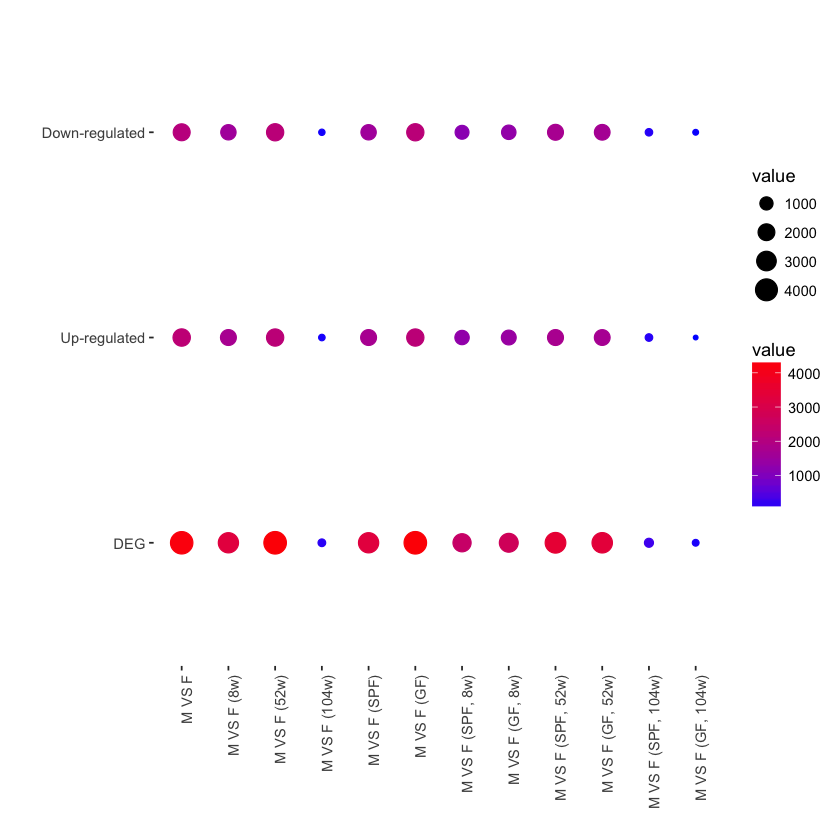

In [9]:
plot_stat_mat(stats)

In [10]:
mat = as.data.frame(stats)
colnames(mat) = c("DEG","PDEG","NDEG")
mat$age = factor(c("2/12/24mo","2mo","12mo","24mo","2/12/24mo","2/12/24mo","2mo","2mo","12mo","12mo","24mo","24mo"),
                 levels = c("2mo", "12mo", "24mo","2/12/24mo"))
mat$type = factor(c(rep("SPF/GF",4),rep(c("SPF","GF"),4)),
                    levels = c("SPF/GF", "GF","SPF"))
mat

,DEG,PDEG,NDEG,age,type
M VS F,4242,2193,2049,2/12/24mo,SPF/GF
M VS F (8w),3272,1716,1556,2mo,SPF/GF
M VS F (52w),4299,2154,2145,12mo,SPF/GF
M VS F (104w),158,83,75,24mo,SPF/GF
M VS F (SPF),3272,1716,1556,2/12/24mo,SPF
M VS F (GF),4299,2154,2145,2/12/24mo,GF
"M VS F (SPF, 8w)",2462,1291,1171,2mo,SPF
"M VS F (GF, 8w)",2730,1419,1311,2mo,GF
"M VS F (SPF, 52w)",3459,1735,1724,12mo,SPF
"M VS F (GF, 52w)",3346,1689,1657,12mo,GF


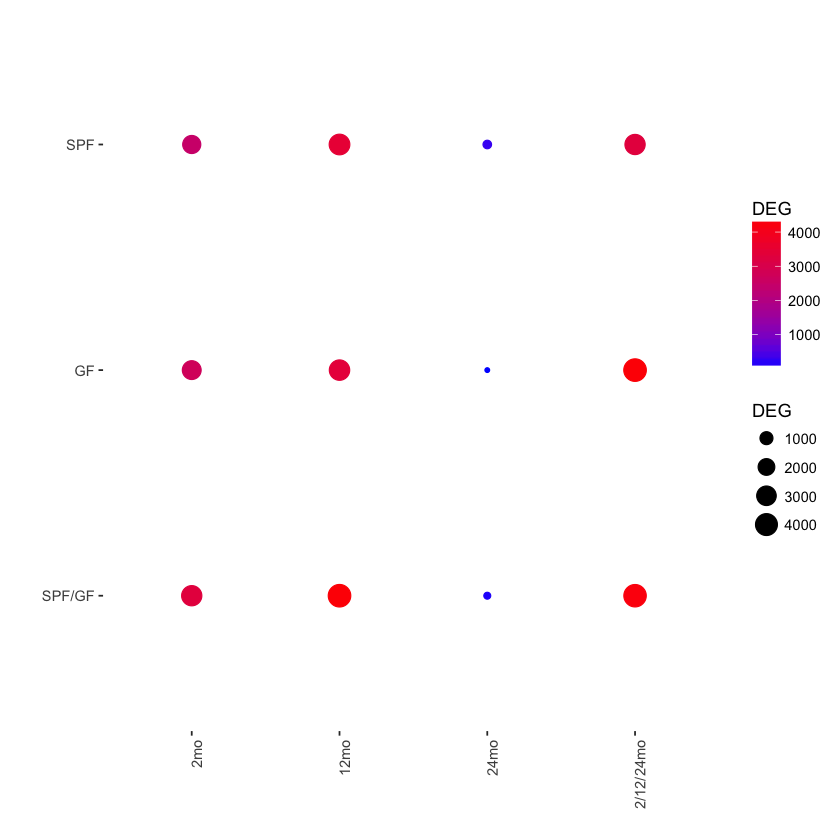

In [11]:
p = ggplot(mat, aes(factor(age), factor(type))) +
    labs(x = "", y = "") +
    theme_bw() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.title.y = element_text(size = rel(1.8)), panel.border = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +        
    geom_point(aes(size=DEG,col=DEG)) + 
    scale_colour_gradient(low = "blue", high="red")
p